# Compare MobileNet Model to CNN:

In [1]:
import tensorflow as tf
import os
import datetime
 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D,Activation,Dropout,Dense,Flatten
from tensorflow.keras.optimizers import Adam
from keras import backend as k
from keras import layers
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
 
import cv2
import matplotlib.pyplot as plt

In [2]:
batch_size = 32 #32,128,256
epochs = 10

In [3]:
train_data_dir = "C:/Users/NEXUS-PC/Desktop/Project/Dataset/train"
test_data_dir = "C:/Users/NEXUS-PC/Desktop/Project/Dataset/test"

In [4]:
# Preparing data
trainGen = ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)
 
testGen = ImageDataGenerator(rescale=1./255)
 
train = trainGen.flow_from_directory(train_data_dir,target_size=(224,224),classes=['with_mask','without_mask'],class_mode = 'categorical',batch_size=batch_size,shuffle=True)
 
test = testGen.flow_from_directory(test_data_dir,target_size=(224,224),classes=['with_mask','without_mask'],class_mode = 'categorical',batch_size=batch_size)


Found 1315 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


In [5]:
mob = MobileNetV2(alpha=1.3,
    input_shape = (224,224,3),
    include_top = False,
    weights = 'imagenet',
)
mob.trainable = False
 
model = Sequential()
model.add(mob)
 
model.add(GlobalAveragePooling2D())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
 
model.add(Dense(2,activation='softmax'))
 
model.summary()

15441920/15441408 [==============================] - 248s 16us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.30_224 (Model) (None, 7, 7, 1664)        3766048   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1664)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                106560    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 3,872,738
Trainable params: 106,690
Non-trainable params: 3,766,048
_________________________________________________________________


In [6]:
model.compile(optimizer=Adam(lr=0.00002),loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
model_saved=model.fit(train,epochs=epochs,validation_data=test)

Epoch 1/10
42/42 [==============================] - 120s 3s/step - loss: 0.6376 - accuracy: 0.6304 - val_loss: 0.4495 - val_accuracy: 0.8608
Epoch 2/10
42/42 [==============================] - 119s 3s/step - loss: 0.4746 - accuracy: 0.7970 - val_loss: 0.3244 - val_accuracy: 0.9433
Epoch 3/10
42/42 [==============================] - 129s 3s/step - loss: 0.3539 - accuracy: 0.8875 - val_loss: 0.2309 - val_accuracy: 0.9742
Epoch 4/10
42/42 [==============================] - 121s 3s/step - loss: 0.2804 - accuracy: 0.9217 - val_loss: 0.1676 - val_accuracy: 0.9845
Epoch 5/10
42/42 [==============================] - 121s 3s/step - loss: 0.2175 - accuracy: 0.9551 - val_loss: 0.1266 - val_accuracy: 0.9845
Epoch 6/10
42/42 [==============================] - 126s 3s/step - loss: 0.1793 - accuracy: 0.9673 - val_loss: 0.0983 - val_accuracy: 0.9845
Epoch 7/10
42/42 [==============================] - 118s 3s/step - loss: 0.1458 - accuracy: 0.9749 - val_loss: 0.0786 - val_accuracy: 0.9897
Epoch 8/10
42

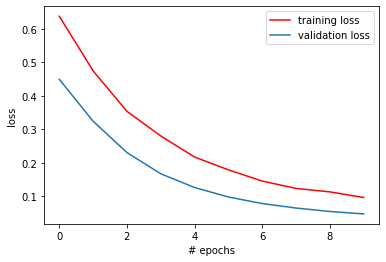

In [8]:
from matplotlib import pyplot as plt

plt.plot(model_saved.history['loss'],'r',label='training loss')
plt.plot(model_saved.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

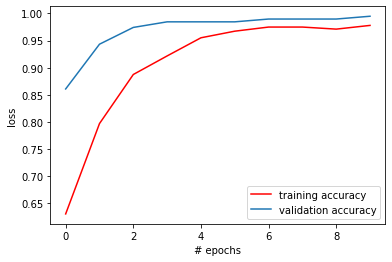

In [9]:
plt.plot(model_saved.history['accuracy'],'r',label='training accuracy')
plt.plot(model_saved.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

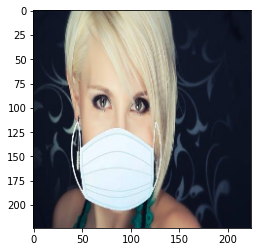

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Instructions for updating:
Please use `model.predict()` instead.
[0]
Probability:[[0.54925287 0.45074716]]
MASK


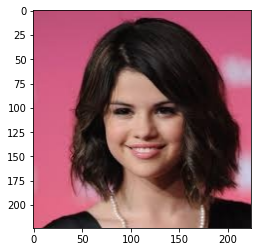

[1]
Probability:[[0.15182781 0.8481722 ]]
No MSK


In [10]:
def predict_mask(path):
    im = cv2.imread(path)
    im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
 
    plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
    plt.show()
     
    img_pred = image.load_img(path,target_size=(224,224))
    img_pred = image.img_to_array(img_pred)
    img = np.expand_dims(img_pred,axis=0)
    result = model.predict_classes(img)
    prob = model.predict_proba(img)
    print(result)
    print('Probability:{}'.format(prob))
    if result[0]==0:
        prediction ="MASK"
    else:
        prediction ="No MSK"
 
    print(prediction)
 
 
# Function calling 
 
predict_mask('C:/Users/NEXUS-PC/Desktop/Project/Dataset/test/with_mask/5-with-mask.jpg')
predict_mask('C:/Users/NEXUS-PC/Desktop/Project/Dataset/test/without_mask/11.jpg')
 